In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as mt
#  For warings remove
import warnings
warnings.filterwarnings('ignore')
# dataframe view..
pd.set_option('display.max_columns',50)

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [4]:
test.describe().T

count         mean        std       min  \
Item_Weight                4705.0    12.695633   4.664849     4.555   
Item_Visibility            5681.0     0.065684   0.051252     0.000   
Item_MRP                   5681.0   141.023273  61.809091    31.990   
Outlet_Establishment_Year  5681.0  1997.828903   8.372256  1985.000   

                                   25%          50%          75%          max  
Item_Weight                   8.645000    12.500000    16.700000    21.350000  
Item_Visibility               0.027047     0.054154     0.093463     0.323637  
Item_MRP                     94.412000   141.415400   186.026600   266.588400  
Outlet_Establishment_Year  1987.000000  1999.000000  2004.000000  2009.000000

In [5]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [6]:
pd.crosstab(test.Item_Type,test.Item_MRP,margins=False).style.background_gradient(cmap='summer_r')

### Exploratotry Data Analysis....




* Understand the Problem Statement
* Univariate Analysis
* Bi-variate /multivariate Analysis
* Missing Values
* Outlier Analysis
* **Feature Engineering**
* Data preprocessing Step- Scaling and Transformation 

In [7]:
train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [8]:
train.shape ,test.shape # n and n-1 coloums representative

((8523, 12), (5681, 11))

In [9]:
# combine the data
combined = pd.concat([train,test],ignore_index= True)

In [10]:
combined.shape

(14204, 12)

## Univariate Analysis
* Its Means analysing  the data single handedly. In other words, take each and every column and analyse it.

* Now , the data has two types of cloumns - numeric and categorical

* In numerical data ,the way of analysing the data - **Histogram or a Distplot..**

* In case of Categorical Data , we can create **Frequency Plot** which is Know as **Countplot** in python.

* 

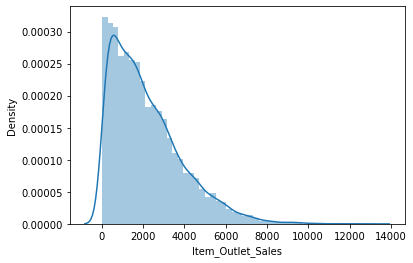

In [11]:
# Sales...

sns.distplot(combined.Item_Outlet_Sales)
plt.show()

In [12]:
# Mean ,Median and mode
# 5 point summary 
combined.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [13]:
combined.Item_Outlet_Sales.mean()

2181.2889135750365

In [14]:
combined.Item_Outlet_Sales.skew()

1.1775306028542796

In [15]:
# Pull the numerical Column
num_cols = combined.select_dtypes(include=np.number).columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
num_data = combined.select_dtypes(include=['O'])
num_data.head()

Item_Identifier Item_Fat_Content              Item_Type Outlet_Identifier  \
0           FDA15          Low Fat                  Dairy            OUT049   
1           DRC01          Regular            Soft Drinks            OUT018   
2           FDN15          Low Fat                   Meat            OUT049   
3           FDX07          Regular  Fruits and Vegetables            OUT010   
4           NCD19          Low Fat              Household            OUT013   

  Outlet_Size Outlet_Location_Type        Outlet_Type  
0      Medium               Tier 1  Supermarket Type1  
1      Medium               Tier 3  Supermarket Type2  
2      Medium               Tier 1  Supermarket Type1  
3         NaN               Tier 3      Grocery Store  
4        High               Tier 3  Supermarket Type1

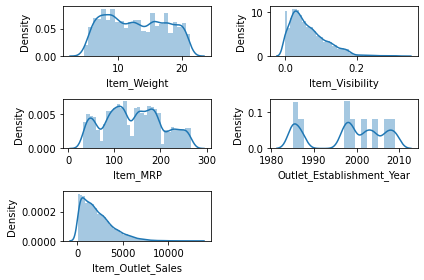

In [17]:
nrows = 3
ncol = 2
repeater = 1
for i in num_cols:
    plt.subplot(nrows,ncol,repeater)
    sns.distplot(combined.loc[:,i])
    repeater = repeater+1    
plt.tight_layout()
plt.show()


In [18]:
cat_data = combined.select_dtypes(include=['O']).columns
cat_data

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [19]:
cat_cols =['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

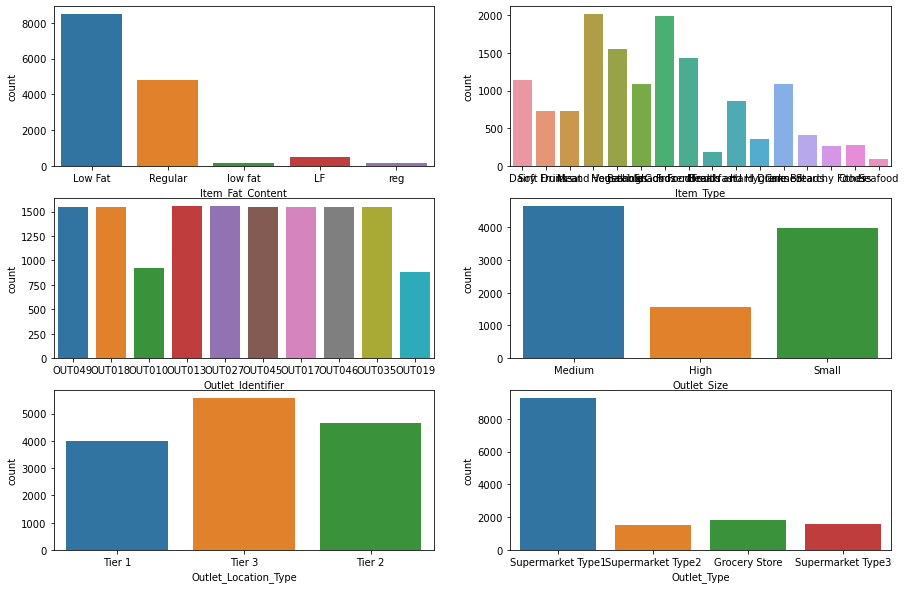

In [20]:
nrows = 3
ncol = 2
iterator = 1
plt.figure(figsize=(15,10))
for i in cat_cols:
    plt.subplot(nrows,ncol,iterator)
    sns.countplot(combined.loc[:,i])
    iterator =iterator+1
plt.show()

### Bivariate Analysis


* Num vs Num(Target Variable) ~ **Scattarplot**
* Cat vs Num (tgt var) ~ **Boxplot** & **Violinplot**
* Cat vs Cat (Tgt Var) ~ **(pd.crosstab(Freq Table)& Countplot**


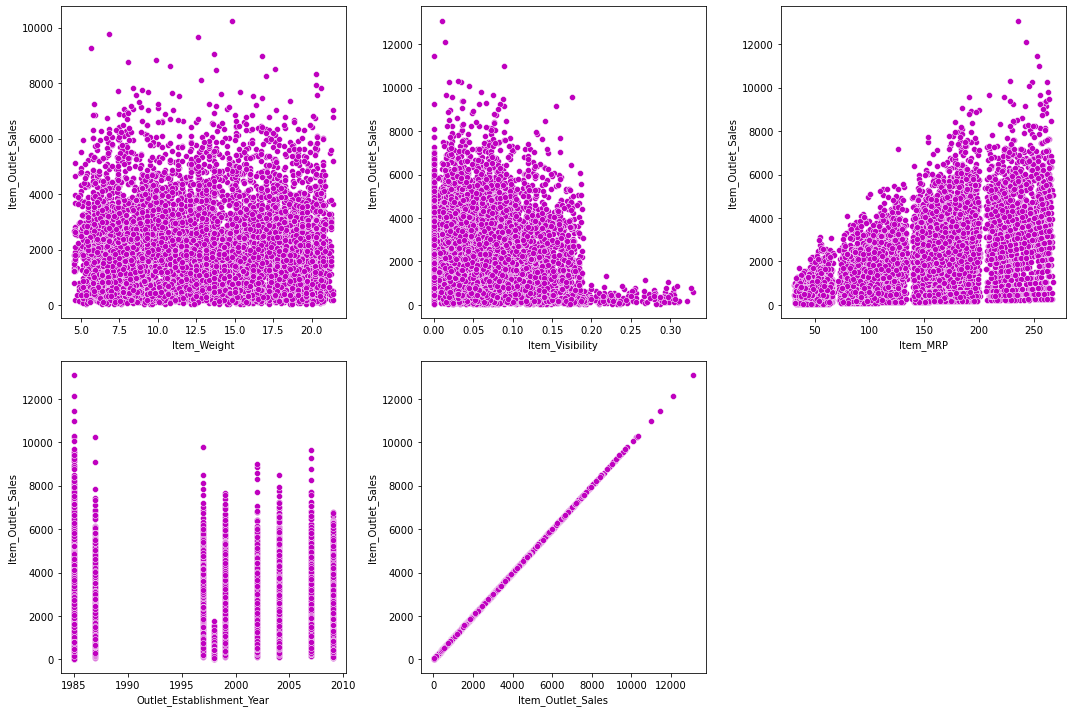

In [21]:
# Num vs Num 

nrows = 2
ncol = 3
iterator =1
plt.figure(figsize=(15,10))
for i in num_cols:
    plt.subplot(nrows,ncol,iterator)
    sns.scatterplot(combined.loc[:,i],combined.Item_Outlet_Sales,color ='m')
    iterator = iterator+1
plt.tight_layout()
plt.show()

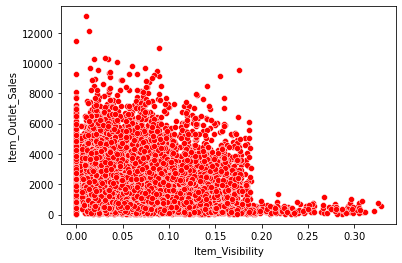

In [22]:
# Item Visibility 

sns.scatterplot(data = combined,y= 'Item_Outlet_Sales',x='Item_Visibility',color = 'r')
plt.show()

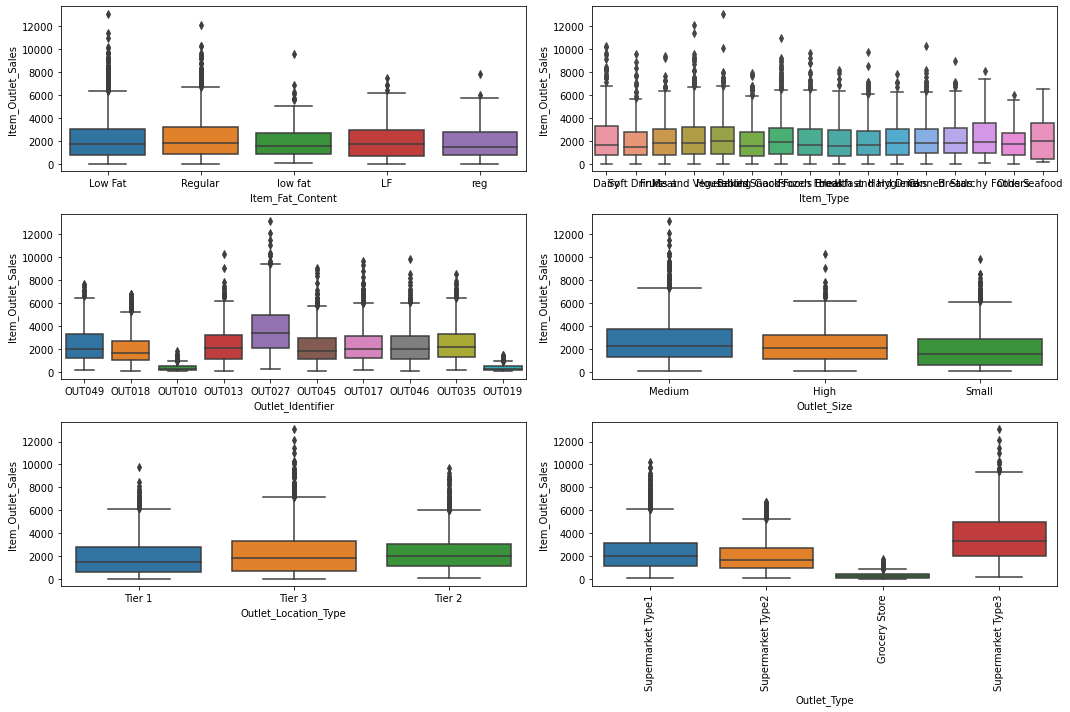

In [23]:
# Num vs Num 
# In case of Category we applying Box Plot

nrows = 3
ncol = 2
iterator =1
plt.figure(figsize=(15,10))
for i in cat_cols:
    plt.subplot(nrows,ncol,iterator)
    sns.boxplot(combined.loc[:,i],combined.loc[:,'Item_Outlet_Sales'])
    iterator = iterator+1
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [24]:
# Fxed the item fat

combined.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [25]:
combined.Item_Fat_Content.replace(to_replace=['low fat','LF','reg'],value=['Low Fat','Low Fat','Regular'],inplace=True)

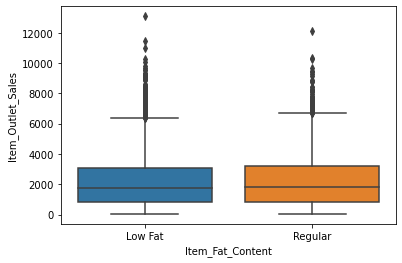

In [26]:
sns.boxplot(combined.Item_Fat_Content,combined.Item_Outlet_Sales)
plt.show()

<AxesSubplot:>

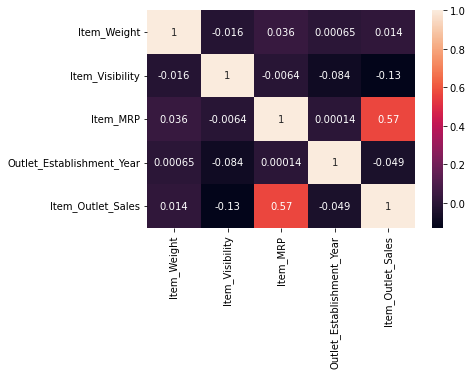

In [27]:
sns.heatmap(combined.loc[:,num_cols].corr(),annot= True)

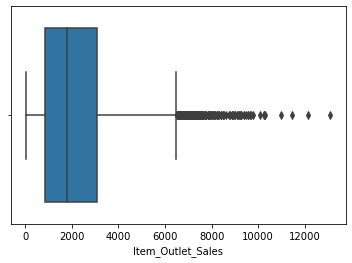

In [28]:
sns.boxplot(combined.Item_Outlet_Sales)
plt.show()


### Summary
 
 * while dealing with theh missing values, we need to make sure that we impute the data the median. Although there is no constraint on not using the mean 
 
 
 ### Understand the outlier usnig the Box Plote & guassion Cruve
 

In [29]:
# Removing the Outliers from the Item Outlier Sales;
# Q1(0,25)
Q1 = combined.Item_Outlet_Sales.quantile(0.25)
Q1

834.2474

In [30]:
Q3 = combined.Item_Outlet_Sales.quantile(0.75)
Q3

3101.2964

In [31]:
IQR = Q3 - Q1
IQR

2267.049

In [32]:
# Calculate the Range
upper_range = Q3+1.5*(IQR)
lower_range = Q1-1.5*(IQR)

print('Upper Range',upper_range)
print('Lower Range',lower_range)

Upper Range 6501.8699
Lower Range -2566.3261


In [33]:
combined.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [34]:
# Code for removing the outlier 

wt_outlier =combined.loc[~(combined.Item_Outlet_Sales>upper_range)|(combined.Item_Outlet_Sales<lower_range)]

<AxesSubplot:xlabel='Item_Outlet_Sales'>

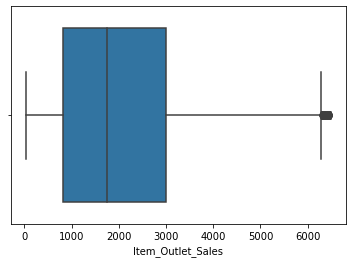

In [35]:
sns.boxplot(wt_outlier.Item_Outlet_Sales)

In [36]:
wt_outlier.Item_Outlet_Sales.describe()

count    8337.000000
mean     2059.362844
std      1506.099754
min        33.290000
25%       810.944400
50%      1747.059200
75%      2998.097400
max      6478.234000
Name: Item_Outlet_Sales, dtype: float64

## Outlier Removal Using Z Score

In [37]:
# Calculate the Z score for the Target Val.
mew = combined.Item_Outlet_Sales.mean()
sigma = combined.Item_Outlet_Sales.std()

zscore = (combined.Item_Outlet_Sales - mew)/sigma

print(zscore.describe())

count    8.523000e+03
mean    -2.509302e-15
std      1.000000e+00
min     -1.258716e+00
25%     -7.893594e-01
50%     -2.267553e-01
75%      5.391197e-01
max      6.390670e+00
Name: Item_Outlet_Sales, dtype: float64


In [38]:
# Save the Zscore in Data
combined['zscore'] = zscore

In [39]:
combined.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales    zscore  
0  Supermarket Type1          3735.1380  0.910548  
1  Supermarket Type2           443.4228 -1.018381  
2  Supermarket Type1          2097.2700 -0.049235  
3      Grocery Store           732.3800 -0.849053  
4  Supermarket Type1           994.7052 -0.695332

In [40]:
# Eliminate The Olutlier Using The zscore 
wt_outlier_using_zsore = \
combined[~((combined.zscore>3)|(combined.zscore<-3))].shape

In [41]:
combined.isnull().sum()[combined.isnull().sum() !=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
zscore               5681
dtype: int64

In [42]:
# Preview the data where the Item Weight is Missingl
combined.loc[combined.Item_Weight.isnull()].head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7            FDP10          NaN          Low Fat         0.127470   
18           DRI11          NaN          Low Fat         0.034238   
21           FDW12          NaN          Regular         0.035400   
23           FDC37          NaN          Low Fat         0.057557   
29           FDC14          NaN          Regular         0.072222   

       Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
7    Snack Foods  107.7622            OUT027                       1985   
18   Hard Drinks  113.2834            OUT027                       1985   
21  Baking Goods  144.5444            OUT027                       1985   
23  Baking Goods  107.6938            OUT019                       1985   
29        Canned   43.6454            OUT019                       1985   

   Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
7       Medium               Tier 3  Supermarket Type3          4022.7636   
18      Medium               Tier 3  Supermarket Type3          2303.6680   
21      Medium               Tier 3  Supermarket Type3          4064.0432   
23       Small               Tier 1      Grocery Store           214.3876   
29       Small               Tier 1      Grocery Store           125.8362   

      zscore  
7   1.079095  
18  0.071714  
21  1.103284  
23 -1.152594  
29 -1.204485

In [43]:
combined.loc[combined.Item_Identifier=='FDW12','Item_Weight']

21         NaN
1788     8.315
2973     8.315
5319     8.315
6285     8.315
7004     8.315
7259     8.315
8583     8.315
9104       NaN
10523    8.315
Name: Item_Weight, dtype: float64

In [44]:
# Item Weight is linked with Item Id

#combined.groupby('Item_Identifier')['Item_Weight'].apply(lambda x:x.fillna(x.median()))



In [45]:
miss =combined.loc[combined.Item_Weight.isnull()]

In [46]:
miss.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7            FDP10          NaN          Low Fat         0.127470   
18           DRI11          NaN          Low Fat         0.034238   
21           FDW12          NaN          Regular         0.035400   
23           FDC37          NaN          Low Fat         0.057557   
29           FDC14          NaN          Regular         0.072222   

       Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
7    Snack Foods  107.7622            OUT027                       1985   
18   Hard Drinks  113.2834            OUT027                       1985   
21  Baking Goods  144.5444            OUT027                       1985   
23  Baking Goods  107.6938            OUT019                       1985   
29        Canned   43.6454            OUT019                       1985   

   Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
7       Medium               Tier 3  Supermarket Type3          4022.7636   
18      Medium               Tier 3  Supermarket Type3          2303.6680   
21      Medium               Tier 3  Supermarket Type3          4064.0432   
23       Small               Tier 1      Grocery Store           214.3876   
29       Small               Tier 1      Grocery Store           125.8362   

      zscore  
7   1.079095  
18  0.071714  
21  1.103284  
23 -1.152594  
29 -1.204485

In [47]:
val =combined.loc[combined.Item_Identifier == 'FDP10','Item_Weight'].median()

In [48]:
combined.loc[7,'Item_Weight']= val

In [49]:
# Find the row  and item with Missing Values

row_index = miss.index
item_ids = miss.Item_Identifier

In [50]:
#combined.loc[7,'Item_Weight']= val
#combined.loc[combined.Item_Identifier == 'FDP10','Item_Weight'].median()

for i in row_index:
    combined.loc[i,'Item_Weight']= \
    combined.loc[combined.Item_Identifier==item_ids[i],'Item_Weight'].median()
                

In [51]:
combined.Item_Weight.isnull().sum()

0

In [52]:
# Item Visibility 

visible = combined.loc[combined.Item_Visibility==0]

In [53]:
value = combined.loc[3,'Item_Visibility']=combined.loc[combined.Item_Identifier== 'FDX07','Item_Visibility'].median()

In [54]:
#visible = combined.loc[combined.Item_Visibility==0]
#value = combined.loc[3,'Item_Visibility']=combined.loc[combined.Item_Identifier== 'FDX07','Item_Visibility'].median()


row_nums = visible.index
visible_ids = visible.Item_Identifier

for i in row_nums:
    combined.loc[i,'Item_Visibility']=combined.loc[combined.Item_Identifier== visible_ids[i],'Item_Visibility'].median()

In [55]:
# Impute the value from Fruits and Veggies

val =combined.loc[(combined.Item_Type=='Fruites and Veggitable'),'Item_Visibility'].median()

In [56]:
combined.loc[combined.Item_Identifier=='FDY07','Item_Visibility']= val

<AxesSubplot:>

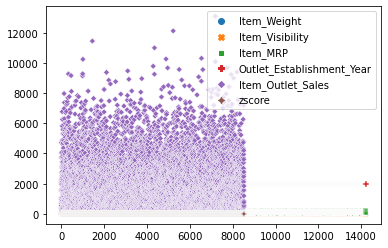

In [57]:
sns.scatterplot(data=combined)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

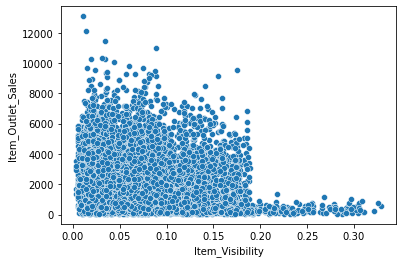

In [58]:
sns.scatterplot(combined.Item_Visibility,combined.Item_Outlet_Sales)

In [59]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Visibility         9
Outlet_Size          4016
Item_Outlet_Sales    5681
zscore               5681
dtype: int64

In [60]:
# Mode of the Outlate SIze

combined.Outlet_Size.mode()[0]

'Medium'

In [61]:
combined[combined.Outlet_Size.isnull()].head(2)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3           FDX07         19.2          Regular         0.022914   
8           FDH17         16.2          Regular         0.016687   

               Item_Type  Item_MRP Outlet_Identifier  \
3  Fruits and Vegetables  182.0950            OUT010   
8           Frozen Foods   96.9726            OUT045   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3                       1998         NaN               Tier 3   
8                       2002         NaN               Tier 2   

         Outlet_Type  Item_Outlet_Sales    zscore  
3      Grocery Store           732.3800 -0.849053  
8  Supermarket Type1          1076.5986 -0.647343

In [62]:
combined.loc[combined.Outlet_Size.isnull(),'Outlet_Type'].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [63]:
pd.DataFrame(combined.groupby('Outlet_Type')['Outlet_Size'].value_counts())

Outlet_Size
Outlet_Type       Outlet_Size             
Grocery Store     Small                880
Supermarket Type1 Small               3100
                  High                1553
                  Medium              1550
Supermarket Type2 Medium              1546
Supermarket Type3 Medium              1559

In [64]:
pd.DataFrame(combined.loc[combined.Outlet_Size.isnull(),['Outlet_Location_Type','Outlet_Type']]['Outlet_Type'])

Outlet_Type
3          Grocery Store
8      Supermarket Type1
9      Supermarket Type1
25     Supermarket Type1
28         Grocery Store
...                  ...
14191      Grocery Store
14193  Supermarket Type1
14201  Supermarket Type1
14202  Supermarket Type1
14203  Supermarket Type1

[4016 rows x 1 columns]

### Feature Engineering 
* Iteam Identifier

In [65]:
ids = []
for i in combined.Item_Identifier:
    ids.append(i[:2])

In [66]:
combined['ids']=pd.Series(ids)

In [67]:
combined.ids.unique()

array(['FD', 'DR', 'NC'], dtype=object)

<AxesSubplot:xlabel='ids', ylabel='Item_Outlet_Sales'>

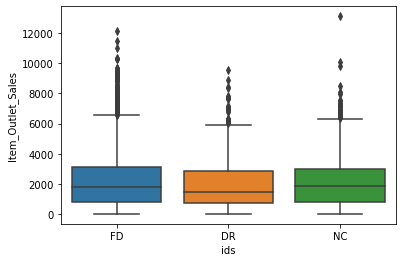

In [68]:
sns.boxplot(data=combined,x='ids',y='Item_Outlet_Sales')

In [69]:
combined.loc[combined.ids=='NC','Item_Fat_Content']='Non Edible'

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

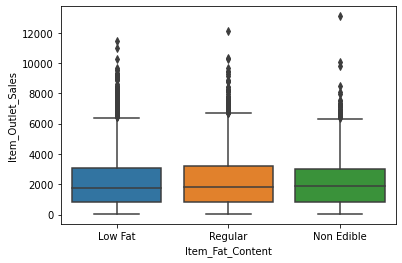

In [70]:
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=combined)

In [71]:
combined['price_per_unit'] = combined.Item_MRP/combined.Item_Weight

<AxesSubplot:xlabel='price_per_unit', ylabel='Item_Outlet_Sales'>

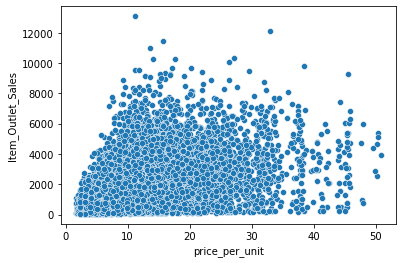

In [72]:
sns.scatterplot(combined.price_per_unit,combined.Item_Outlet_Sales)

<AxesSubplot:xlabel='price_per_unit'>

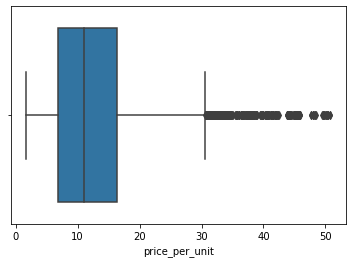

In [73]:
sns.boxplot(combined.price_per_unit)

In [74]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

### Catagorical Var

* Binning 

In [75]:
perishable = ['Dairy','Meat','Fruits and Vegetables','Breakfast','Breads','Seafood']

In [76]:
def banado(x):
    if x in perishable:
        return('Perishables')
    else:
        return('Non Perishable')

In [77]:
combined['Banadiya']=combined.Item_Type.apply(banado)

<AxesSubplot:xlabel='Banadiya', ylabel='Item_Outlet_Sales'>

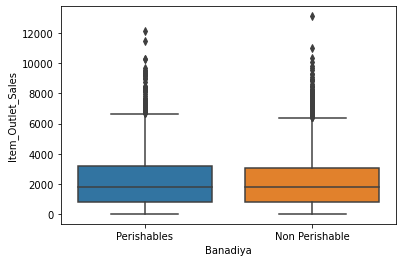

In [78]:
sns.boxplot(data=combined ,x='Banadiya',y='Item_Outlet_Sales')

In [79]:
combined.groupby('Item_Identifier')['Item_Outlet_Sales'].describe().head(2)

count         mean          std       min        25%  \
Item_Identifier                                                         
DRA12              6.0  1843.600200  1348.365430  283.6308  886.34625   
DRA24              7.0  2246.218971  1951.090357  327.5736  737.04060   

                       50%        75%        max  
Item_Identifier                                   
DRA12            1772.6925  2552.6772  3829.0158  
DRA24            1146.5076  3930.8832  4913.6040

In [80]:
top2 = ['OUT027','OUT013']
bottom2 = ['OUT010','OUT019']

def outlet_class(x):
    if x in top2:
        return('Mast')
    elif x in bottom2:
        return('Worst')
    else:
        return('Thik Thak')

In [81]:
combined['Outlets']=combined.Outlet_Identifier.apply(outlet_class)

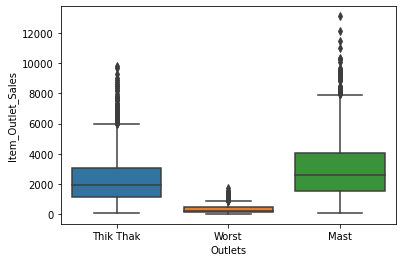

In [82]:
sns.boxplot(data=combined ,x='Outlets',y='Item_Outlet_Sales')
plt.show()

In [83]:
# Drop the Unnecessory variables

new = combined.drop(['Item_Identifier','Outlet_Identifier','Item_Type','Outlet_Establishment_Year'],axis =1)

In [84]:
new.head()

Item_Weight Item_Fat_Content  Item_Visibility  Item_MRP Outlet_Size  \
0         9.30          Low Fat         0.016047  249.8092      Medium   
1         5.92          Regular         0.019278   48.2692      Medium   
2        17.50          Low Fat         0.016760  141.6180      Medium   
3        19.20          Regular         0.022914  182.0950         NaN   
4         8.93       Non Edible         0.013177   53.8614        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales    zscore ids  \
0               Tier 1  Supermarket Type1          3735.1380  0.910548  FD   
1               Tier 3  Supermarket Type2           443.4228 -1.018381  DR   
2               Tier 1  Supermarket Type1          2097.2700 -0.049235  FD   
3               Tier 3      Grocery Store           732.3800 -0.849053  FD   
4               Tier 3  Supermarket Type1           994.7052 -0.695332  NC   

   price_per_unit        Banadiya    Outlets  
0       26.861204     Perishables  Thik Thak  
1        8.153581  Non Perishable  Thik Thak  
2        8.092457     Perishables  Thik Thak  
3        9.484115     Perishables      Worst  
4        6.031512  Non Perishable       Mast

## Data Preprocessing

* Scaling 
* Transformation

In [85]:
# Split the Data 
train.shape,test.shape

((8523, 12), (5681, 11))

In [86]:
new_train = new.loc[0:train.shape[0]-1]
new_train

Item_Weight Item_Fat_Content  Item_Visibility  Item_MRP Outlet_Size  \
0           9.300          Low Fat         0.016047  249.8092      Medium   
1           5.920          Regular         0.019278   48.2692      Medium   
2          17.500          Low Fat         0.016760  141.6180      Medium   
3          19.200          Regular         0.022914  182.0950         NaN   
4           8.930       Non Edible         0.013177   53.8614        High   
...           ...              ...              ...       ...         ...   
8518        6.865          Low Fat         0.056783  214.5218        High   
8519        8.380          Regular         0.046982  108.1570         NaN   
8520       10.600       Non Edible         0.035186   85.1224       Small   
8521        7.210          Regular         0.145221  103.1332      Medium   
8522       14.800          Low Fat         0.044878   75.4670       Small   

     Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales    zscore ids  \
0                  Tier 1  Supermarket Type1          3735.1380  0.910548  FD   
1                  Tier 3  Supermarket Type2           443.4228 -1.018381  DR   
2                  Tier 1  Supermarket Type1          2097.2700 -0.049235  FD   
3                  Tier 3      Grocery Store           732.3800 -0.849053  FD   
4                  Tier 3  Supermarket Type1           994.7052 -0.695332  NC   
...                   ...                ...                ...       ...  ..   
8518               Tier 3  Supermarket Type1          2778.3834  0.349894  FD   
8519               Tier 2  Supermarket Type1           549.2850 -0.956346  FD   
8520               Tier 2  Supermarket Type1          1193.1136 -0.579066  NC   
8521               Tier 3  Supermarket Type2          1845.5976 -0.196713  FD   
8522               Tier 1  Supermarket Type1           765.6700 -0.829545  DR   

      price_per_unit        Banadiya    Outlets  
0          26.861204     Perishables  Thik Thak  
1           8.153581  Non Perishable  Thik Thak  
2           8.092457     Perishables  Thik Thak  
3           9.484115     Perishables      Worst  
4           6.031512  Non Perishable       Mast  
...              ...             ...        ...  
8518       31.248623  Non Perishable       Mast  
8519       12.906563  Non Perishable  Thik Thak  
8520        8.030415  Non Perishable  Thik Thak  
8521       14.304189  Non Perishable  Thik Thak  
8522        5.099122  Non Perishable  Thik Thak  

[8523 rows x 13 columns]

In [87]:
new_test = new.loc[train.shape[0]:]

In [88]:
new_test.drop('Item_Outlet_Sales',axis = 1,inplace =True)

In [89]:
#combined.drop(['zscore'],axis = 1,inplace=True)

### Standardization

In [90]:
import sklearn as sk
from sklearn.preprocessing import StandardScaler

In [91]:
sc = StandardScaler()

In [92]:
# Fit The StandardScaler to the training Set
num_vars = new_train.select_dtypes(include = np.number)
num_vars

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales    zscore  \
0           9.300         0.016047  249.8092          3735.1380  0.910548   
1           5.920         0.019278   48.2692           443.4228 -1.018381   
2          17.500         0.016760  141.6180          2097.2700 -0.049235   
3          19.200         0.022914  182.0950           732.3800 -0.849053   
4           8.930         0.013177   53.8614           994.7052 -0.695332   
...           ...              ...       ...                ...       ...   
8518        6.865         0.056783  214.5218          2778.3834  0.349894   
8519        8.380         0.046982  108.1570           549.2850 -0.956346   
8520       10.600         0.035186   85.1224          1193.1136 -0.579066   
8521        7.210         0.145221  103.1332          1845.5976 -0.196713   
8522       14.800         0.044878   75.4670           765.6700 -0.829545   

      price_per_unit  
0          26.861204  
1           8.153581  
2           8.092457  
3           9.484115  
4           6.031512  
...              ...  
8518       31.248623  
8519       12.906563  
8520        8.030415  
8521       14.304189  
8522        5.099122  

[8523 rows x 6 columns]

In [93]:
cols = ['Item_Weight','Item_Visibility','Item_MRP','price_per_unit']

In [94]:
for i in cols:
    new_train.loc[:,i]= \
    sc.fit_transform(pd.DataFrame(new_train.loc[:,i]))

In [95]:
for i in cols:
    new_test.loc[:,i]= \
    sc.transform(pd.DataFrame(new_test.loc[:,i]))

In [96]:
new_train.head(2)

Item_Weight Item_Fat_Content  Item_Visibility  Item_MRP Outlet_Size  \
0    -0.769246          Low Fat        -1.085101  1.747454      Medium   
1    -1.496813          Regular        -1.020447 -1.489023      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales    zscore ids  \
0               Tier 1  Supermarket Type1          3735.1380  0.910548  FD   
1               Tier 3  Supermarket Type2           443.4228 -1.018381  DR   

   price_per_unit        Banadiya    Outlets  
0        1.761951     Perishables  Thik Thak  
1       -0.569097  Non Perishable  Thik Thak

In [97]:
new_train.describe()

Item_Weight  Item_Visibility      Item_MRP  Item_Outlet_Sales  \
count  8.523000e+03     8.516000e+03  8.523000e+03        8523.000000   
mean   6.168492e-16    -1.098490e-16 -1.644427e-16        2181.288914   
std    1.000059e+00     1.000059e+00  1.000059e+00        1706.499616   
min   -1.790638e+00    -1.334692e+00 -1.761688e+00          33.290000   
25%   -8.801027e-01    -7.801560e-01 -7.574307e-01         834.247400   
50%   -5.889904e-02    -2.502412e-01  3.243893e-02        1794.331000   
75%    8.559412e-01     5.521717e-01  7.170372e-01        3101.296400   
max    1.824595e+00     5.165252e+00  2.021724e+00       13086.964800   

             zscore  price_per_unit  
count  8.523000e+03    8.523000e+03  
mean  -2.509302e-15    1.171837e-16  
std    1.000000e+00    1.000059e+00  
min   -1.258716e+00   -1.374983e+00  
25%   -7.893594e-01   -7.442887e-01  
50%   -2.267553e-01   -2.187123e-01  
75%    5.391197e-01    4.421502e-01  
max    6.390670e+00    4.741801e+00

### Normalization

* its known as Min Max Scaler The Formula for Min Max Sclaer is (Xi-Min)(Max-min)

* This scaliing approach with convert all the coloumns in such a way that each
  col haas min and max values

* We apply this on that has either very less outlier or no outliers

* Its applied on Images 

In [98]:
# Lib from Min Max Scaler
from sklearn.preprocessing import MinMaxScaler 
minmax = MinMaxScaler()

In [99]:
cols = ['Item_MRP','Item_Visibility']
for i in cols:
    train.loc[:,i]=minmax.fit_transform(pd.DataFrame(train.loc[:,i]))

In [100]:
train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.201382     0.465635                1997.831867   
std       4.643456         0.157123     0.264327                   8.371760   
min       4.555000         0.000000     0.000000                1985.000000   
25%       8.773750         0.082187     0.265437                1987.000000   
50%      12.600000         0.164228     0.474209                1999.000000   
75%      16.850000         0.288026     0.655156                2004.000000   
max      21.350000         1.000000     1.000000                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

### Enconding Categorical Variables 

In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [102]:
le.fit_transform(new_train.Outlet_Size)

array([1, 1, 1, ..., 2, 1, 2])

In [103]:
new_train.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [104]:
size = {'Small':1,'Medium':2,'High':3}

In [105]:
new_train['Outlet_Size']=new_train.Outlet_Size.map(size)
new_test['Outlet_Size']=new_test.Outlet_Size.map(size)

In [106]:
dummytrain = pd.get_dummies(new_train,drop_first=True)
dummytest = pd.get_dummies(new_test,drop_first=True)


In [107]:
dummytrain.shape,dummytest.shape

((8523, 19), (5681, 18))

### Two More Encoding Techniques

* Frequency Encoding
* Target Encoding

In [108]:
train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.048866   
1           DRC01         5.92          Regular         0.058705   
2           FDN15        17.50          Low Fat         0.051037   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  0.927507            OUT049   
1            Soft Drinks  0.072068            OUT018   
2                   Meat  0.468288            OUT049   
3  Fruits and Vegetables  0.640093            OUT010   
4              Household  0.095805            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [109]:
target= train.groupby("Item_Type")["Item_Outlet_Sales"].mean().to_dict()

In [ ]:
train["Item_Type"]=train.Item_Type.map(target)

In [ ]:
test["Item_Type"]=test.Item_Type.map(target)